In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 데이터 불러오기 및 확인

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/기계학습/data/train_V2.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# 2. 데이터 전처리

## 1) 결측치 처리

In [5]:
is_null = df.isnull().any()
print(is_null)

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool


In [6]:
num_missing = df['winPlacePerc'].isnull().sum()

print("결측치 개수:", num_missing)

결측치 개수: 1


In [7]:
df.dropna(inplace=True)

## 2) 이상치 처리
- 게임 설계에 맞지 않고 극단적인 상황(불가능 상황, 잘못된 기록 등)으로 이상치로 간주될 수 있는 경우

In [8]:
# maxPlace가 일정 수준 이하인 경우 제거(특이한 상황일 가능성 높음)
df=df[df['maxPlace']>20]

# 최고 등수보다 킬 수가 많은 이상치 제거
df = df[(df['kills'] <= df['maxPlace'])]

# 차량 탄 거리가 0인데 roadkill이 1 이상인 경우
df = df.drop(df[(df['rideDistance'] == 0) & (df['roadKills'] > 0)].index)

# 한 매치에서 최대 킬 수가 해당 매치의 참여 인원수보다 많은 경우
df = df.groupby('matchId').filter(lambda x: x['kills'].max() <= x['numGroups'].max())

# 움직인 거리가 0인데 무기 획득 개수가 0보다 큰 경우 이상치로 판단하여 제거
df.drop(df[(df['walkDistance'] ==0) & (df['weaponsAcquired'] > 0)].index, inplace=True)

# 적을 1번 이상 다운시켰는데 입힌 대미지가 0인 경우 이상치로 판단하여 제거
df.drop(df[(df['DBNOs']>0)&(df['damageDealt']==0)].index, inplace=True)

## 3) 특수 게임 모드 제거

In [9]:
# 특수 게임 모드 제거
words_to_match = ['crashfpp', 'flaretpp', 'crashtpp', 'flarefpp']

df = df[~df['matchType'].isin(words_to_match)]

## 4) 매치타입 분리

In [10]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-duo-fpp', 'normal-solo-fpp', 'normal-squad-fpp',
       'normal-squad', 'normal-solo'], dtype=object)

In [11]:
match_types = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
               'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp',
               'normal-squad', 'normal-duo', 'normal-solo']

In [12]:
df['solo'] = 0
df['duo'] = 0
df['squad'] = 0
df['normal'] = 0
df['fpp'] = 0

for match_type in match_types:
    if 'solo' in match_type:
        df.loc[df['matchType'] == match_type, 'solo'] = 1
    if 'duo' in match_type:
        df.loc[df['matchType'] == match_type, 'duo'] = 1
    if 'squad' in match_type:
        df.loc[df['matchType'] == match_type, 'squad'] = 1
    if 'normal' in match_type:
        df.loc[df['matchType'] == match_type, 'normal'] = 1
    if 'fpp' in match_type:
        df.loc[df['matchType'] == match_type, 'fpp'] = 1

In [13]:
selected_columns = ['matchType', 'solo', 'duo', 'squad', 'normal', 'fpp']
df_selected = df[selected_columns]
print(df_selected)

         matchType  solo  duo  squad  normal  fpp
0        squad-fpp     0    0      1       0    1
1        squad-fpp     0    0      1       0    1
2              duo     0    1      0       0    0
3        squad-fpp     0    0      1       0    1
4         solo-fpp     1    0      0       0    1
...            ...   ...  ...    ...     ...  ...
4446961  squad-fpp     0    0      1       0    1
4446962       solo     1    0      0       0    0
4446963  squad-fpp     0    0      1       0    1
4446964  squad-fpp     0    0      1       0    1
4446965   solo-fpp     1    0      0       0    1

[4370900 rows x 6 columns]


In [14]:
df = df.drop('matchType', axis=1)

## 5) 새로운 Column 생성

In [15]:
# 게임 중 총 이동거리
df['distanceTravelled'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# 움직인 거리 당 입힌 대미지
df['damagePerDistance'] = df['damageDealt'] / df['distanceTravelled']

df['damagePerDistance'] = df['damagePerDistance'].replace([np.inf, -np.inf], np.nan)
df['damagePerDistance'] = df['damagePerDistance'].fillna(df['damagePerDistance'].mean())

In [16]:
#공격성 판별 기준 제작기
기준1=[]
기준2=[]
기준3=[]
기준4=[]

#20 이하의 등수는 전처리로 삭제했기 때문에 그 값들은 사용하지 않습니다.
#전체 게임 인원을 고려하여 순위에 따른 킬 확률을 산정한 기준입니다. 전체 인원 수 가 20명일 경우 20등이 사망시 킬은 평균적으로 1/19 늘어납니다. 19등이 사망시 1/18입니다.
#결국 평균 킬 수는 1/19+1/18+1/17.....+1/3 이런 식으로 늘어가기 때문에 언젠가 평균 킬이 1이 되는 순간 2가 되는 순간 등이 오게 되는데 그 순간들에 대한 기준입니다.
for i in range(20):
    기준1.append(-1)
    기준2.append(-1)
    기준3.append(-1)
    기준4.append(-1)


for d in range(20,101):
    sum=0
    check1=0
    check2=0
    check3=0
    check4=0
    for i in range(d,1,-1):
        sum+=1/(i-1)
        if ((sum>=1)&(check1==0)):
            기준1.append(i)
            check1=1
        if ((sum>=2)&(check2==0)):
            기준2.append(i)
            check2=1
        if ((sum>=3)&(check3==0)):
            기준3.append(i)
            check3=1
        if ((sum>=4)&(check4==0)):
            기준4.append(i)
            check4=1
        if(i==2):
            if(check1==0):
                기준1.append(-1)
            if(check2==0):
                기준2.append(-1)
            if(check3==0):
                기준3.append(-1)
            if(check4==0):
                기준4.append(-1)

# winPlace(순위) 컬럼 생성
df['winPlace'] = (1 - df['winPlacePerc']) * (df['maxPlace'] - 1) + 1
df['winPlace'] = df['winPlace'].round().astype(int)

df['aggressive']=0

for i in range(20,101):
    if (기준1[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (df['winPlace'] < 기준1[i]) & (df['kills'] > 0), 'aggressive'] = 1

for i in range(20, 101):
    if (기준2[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (기준1[i] < df['winPlace']) & (df['winPlace'] <= 기준2[i]) &
               (df['kills'] > 1), 'aggressive'] = 1

for i in range(20, 101):
    if (기준3[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (기준2[i] < df['winPlace']) & (df['winPlace'] <= 기준3[i]) &
               (df['kills'] > 2), 'aggressive'] = 1

print(df.shape)
print(df[df['aggressive']>=1].shape)

(4370900, 37)
(964705, 37)


In [17]:
# 1 평균 이동 거리 생성 칼럼인데 이동성 1,0 만들기에 필요해서 사용함
df['averageDistance'] = df['distanceTravelled'] / df['matchDuration']

#2. winPlacePer에 따라 계층 분류
df['WPPclass']=0
df['WPPclass'] = np.where((df['winPlacePerc'] >= 0) & (df['winPlacePerc'] <= 0.05), 0, df['WPPclass'])
for i in range(1,20):
    df['WPPclass'] = np.where((df['winPlacePerc'] > i*0.05) & (df['winPlacePerc'] <= i*0.05+0.05), i, df['WPPclass'])

# 결과 확인
print(df[[ 'winPlacePerc','WPPclass']].head())

#3.계층별 distanceMeanList의 평균을 내서 리스트에 저장
distanceMeanList=[]
for i in range(20):
    distanceMeanList.append(round(df.loc[df['WPPclass'] == i, 'distanceTravelled'].mean(),5))

print(distanceMeanList)

#WPPclass 평균보다 distanceTravelled 높은 활발하게 움직이는 사람은 1
df['mobility']=0

for i in range(20):
    df['mobility'] = np.where((df['WPPclass'] == i) & (df['distanceTravelled'] >= distanceMeanList[i]), 1, df['mobility'])


# 결과 확인
print(df.shape)
print(df[df['mobility']>=1].shape)

   winPlacePerc  WPPclass
0        0.4444         8
1        0.6400        12
2        0.7755        15
3        0.1667         3
4        0.1875         3
[62.54856, 120.03564, 183.66984, 263.30735, 347.5183, 469.97177, 631.51723, 845.29878, 1115.24435, 1463.55602, 1781.00604, 2169.54678, 2488.46478, 2842.8927, 3137.54435, 3415.2617, 3635.337, 3847.19895, 4049.19446, 4330.9642]
(4370900, 40)
(1392157, 40)


In [18]:
#그동한 사용하였던 임시 변수 + 중복 변수 제거
df = df.drop(['WPPclass','averageDistance','distanceTravelled','numGroups', 'winPlace'], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370900 entries, 0 to 4446965
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  maxPlace           int64  
 16  rankPoints         int64  
 17  revives            int64  
 18  rideDistance       float64
 19  roadKills          int64  
 20  swimDistance       float64
 21  teamKills          int64  
 22  vehicleDestroys    int64  
 23  walkDistance       float64
 24  weaponsAcquired    int64  
 25  winPoints         

## 6) 데이터 scaling 및 train-test split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 매치타입 스쿼드 데이터 추출
df = df[df['squad'] == 1]
df = df.drop(['solo', 'duo', 'squad'], axis=1)

# 50000개 샘플링
df= df.sample(n=50000, random_state=42)

# 입력 데이터(X)와 타겟 변수(y) 분리
excluded_columns = ["Id", "matchId", "groupId", "rankPoints", "maxPlace"]

X = df.drop(excluded_columns + ["winPlacePerc"], axis=1)
y = df["winPlacePerc"]

# 이진 변수 선택
binary_columns = ['normal', 'fpp']

# 이진 변수를 제외한 수치형 변수 선택
numerical_columns = [col for col in X.columns if col not in binary_columns]

# 이진 변수를 제외한 수치형 변수에 대해 표준화
scaler = StandardScaler()
X_sc = X.copy()
X_sc[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 이진 변수는 원래 값 그대로 사용
X_sc[binary_columns] = X[binary_columns]

# 이진 변수를 제외한 수치형 변수에 대해 정규화
minmax_scaler = MinMaxScaler()
X_mm = X.copy()
X_mm[numerical_columns] = minmax_scaler.fit_transform(X[numerical_columns])

# 이진 변수는 원래 값 그대로 사용
X_mm[binary_columns] = X[binary_columns]

# train과 test로 데이터 분리
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_mm, y, test_size=0.2, random_state=42)

# 3. 모델링

## 1) SVR

StandardScaler

In [21]:
# SVR을 위한 하이퍼 파라미터 튜닝
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr_sc = SVR()

parameters = {'C': [0.1, 1, 25],
              'gamma':[0.01, 0.1, 1]}

grid_svr_sc = GridSearchCV(svr_sc,
                      param_grid = parameters, cv = 5, refit=True) #최적 하이퍼 파라미터를 찾은 뒤 재학습

grid_svr_sc.fit(X_train_sc, y_train_sc)

print("Best Hyperparameters:", grid_svr_sc.best_params_)
print("Best Score:", grid_svr_sc.best_score_)

# 최적 모델로 예측
best_model = grid_svr_sc.best_estimator_
y_pred_svr_sc = best_model.predict(X_test_sc)

# 평가 지표 계산
mae_svr_sc = mean_absolute_error(y_test_sc, y_pred_svr_sc)
mse_svr_sc = mean_squared_error(y_test_sc, y_pred_svr_sc)
r2_svr_sc = r2_score(y_test_sc, y_pred_svr_sc)
rmse_svr_sc = mean_squared_error(y_test_sc, y_pred_svr_sc, squared=False)

print('Mean Absolute Error (MAE):', mae_svr_sc)
print('Mean Squared Error (MSE):', mse_svr_sc)
print('Root Mean Squared Error (RMSE):', rmse_svr_sc)
print('R^2 Score:', r2_svr_sc)

Best Hyperparameters: {'C': 25, 'gamma': 0.01}
Best Score: 0.9366668693682104
Mean Absolute Error (MAE): 0.06005909631867523
Mean Squared Error (MSE): 0.0060831759359502545
Root Mean Squared Error (RMSE): 0.07799471735925616
R^2 Score: 0.9383165417634688


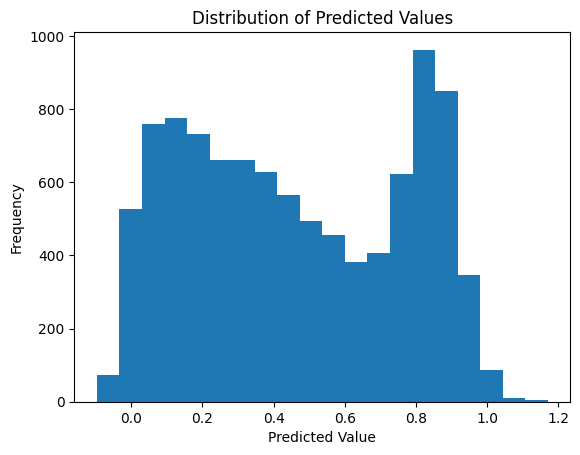

In [22]:
# 예측 값 분포 확인
plt.hist(y_pred_svr_sc, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

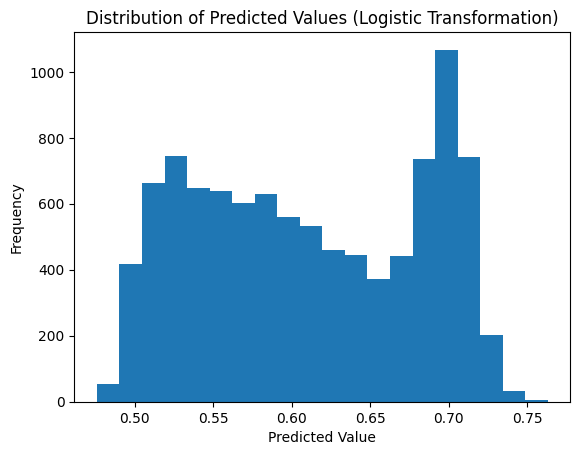

In [23]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
def lg_function(x):
    return 1 / (1 + np.exp(-x))

y_pred_svr_sc_lg = lg_function(y_pred_svr_sc)

plt.hist(y_pred_svr_sc_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

MinMaxScaler

In [24]:
svr_mm = SVR()

grid_svr_mm = GridSearchCV(svr_mm,
                           param_grid=parameters, cv=5, refit=True)

grid_svr_mm.fit(X_train_mm, y_train_mm)

print("Best Hyperparameters:", grid_svr_mm.best_params_)
print("Best Score:", grid_svr_mm.best_score_)

# 최적 모델로 예측
best_model_mm = grid_svr_mm.best_estimator_
y_pred_svr_mm = best_model_mm.predict(X_test_mm)

# 평가 지표 계산
mae_svr_mm = mean_absolute_error(y_test_mm, y_pred_svr_mm)
mse_svr_mm = mean_squared_error(y_test_mm, y_pred_svr_mm)
r2_svr_mm = r2_score(y_test_mm, y_pred_svr_mm)
rmse_svr_mm = mean_squared_error(y_test_mm, y_pred_svr_mm, squared=False)

print('Mean Absolute Error (MAE):', mae_svr_mm)
print('Mean Squared Error (MSE):', mse_svr_mm)
print('Root Mean Squared Error (RMSE):', rmse_svr_mm)
print('R^2 Score:', r2_svr_mm)

Best Hyperparameters: {'C': 25, 'gamma': 1}
Best Score: 0.9350322967284008
Mean Absolute Error (MAE): 0.06081521407544943
Mean Squared Error (MSE): 0.00613152304184332
Root Mean Squared Error (RMSE): 0.07830404230844867
R^2 Score: 0.9378263016785836


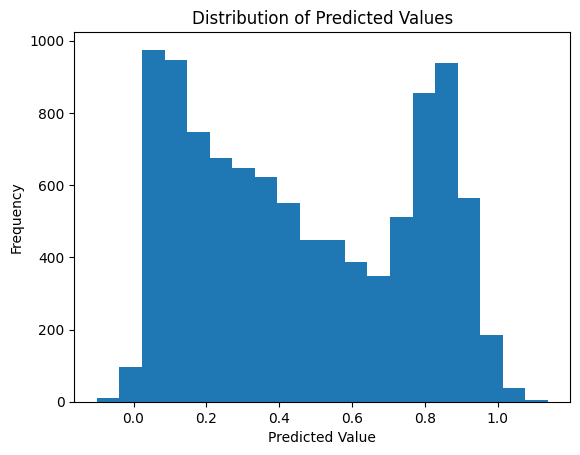

In [25]:
# 예측 값 분포 확인
plt.hist(y_pred_svr_mm, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

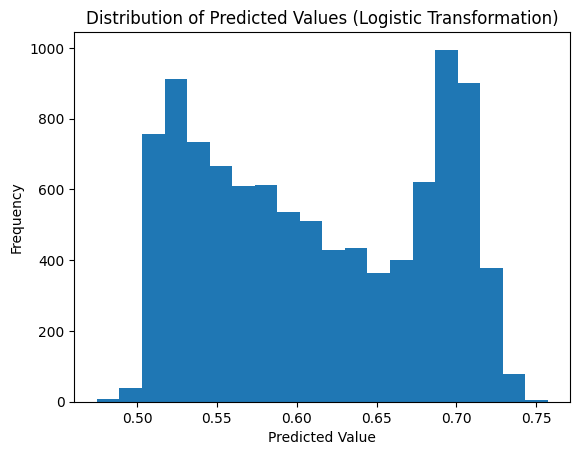

In [26]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_svr_mm_lg = lg_function(y_pred_svr_mm)

plt.hist(y_pred_svr_mm_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

## 2) XGBoost

In [27]:
from xgboost import XGBRegressor

xgb_sc = XGBRegressor(n_jobs=-1)

parameters = {'learning_rate': [0.1, 0.01],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300]}

grid_xgb_sc = GridSearchCV(xgb_sc,
                           param_grid=parameters, cv=5, refit=True)

grid_xgb_sc.fit(X_train_sc, y_train_sc)

print("Best Hyperparameters:", grid_xgb_sc.best_params_)
print("Best Score:", grid_xgb_sc.best_score_)

# 최적 모델로 예측
best_model_xgb_sc = grid_xgb_sc.best_estimator_
y_pred_xgb_sc = best_model_xgb_sc.predict(X_test_sc)

# 평가 지표 계산
mae_xgb_sc = mean_absolute_error(y_test_sc, y_pred_xgb_sc)
mse_xgb_sc = mean_squared_error(y_test_sc, y_pred_xgb_sc)
r2_xgb_sc = r2_score(y_test_sc, y_pred_xgb_sc)
rmse_xgb_sc = mean_squared_error(y_test_sc, y_pred_xgb_sc, squared=False)

print('Mean Absolute Error (MAE):', mae_xgb_sc)
print('Mean Squared Error (MSE):', mse_xgb_sc)
print('Root Mean Squared Error (RMSE):', rmse_xgb_sc)
print('R^2 Score:', r2_xgb_sc)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Score: 0.9457124159598521
Mean Absolute Error (MAE): 0.055287683762877474
Mean Squared Error (MSE): 0.005359800881333676
Root Mean Squared Error (RMSE): 0.0732106609814013
R^2 Score: 0.9456515712678917


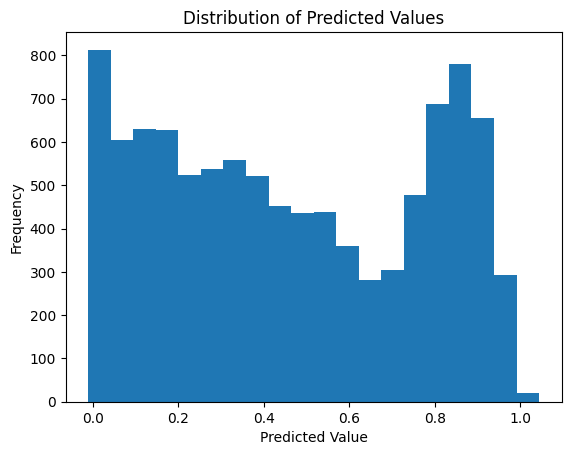

In [28]:
# 예측 값 분포 확인
plt.hist(y_pred_xgb_sc, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

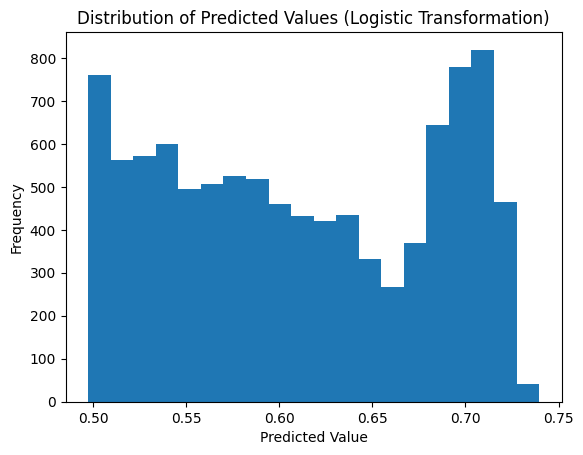

In [29]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_xgb_sc_lg = lg_function(y_pred_xgb_sc)

plt.hist(y_pred_xgb_sc_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

In [30]:
xgb_mm = XGBRegressor(n_jobs=-1)

grid_xgb_mm = GridSearchCV(xgb_mm,
                           param_grid=parameters, cv=5, refit=True)

grid_xgb_mm.fit(X_train_mm, y_train_mm)

print("Best Hyperparameters:", grid_xgb_mm.best_params_)
print("Best Score:", grid_xgb_mm.best_score_)

# 최적 모델로 예측
best_model_xgb_mm = grid_xgb_mm.best_estimator_
y_pred_xgb_mm = best_model_xgb_mm.predict(X_test_mm)

# 평가 지표 계산
mae_xgb_mm = mean_absolute_error(y_test_mm, y_pred_xgb_mm)
mse_xgb_mm = mean_squared_error(y_test_mm, y_pred_xgb_mm)
r2_xgb_mm = r2_score(y_test_mm, y_pred_xgb_mm)
rmse_xgb_mm = mean_squared_error(y_test_mm, y_pred_xgb_mm, squared=False)

print('Mean Absolute Error (MAE):', mae_xgb_mm)
print('Mean Squared Error (MSE):', mse_xgb_mm)
print('Root Mean Squared Error (RMSE):', rmse_xgb_mm)
print('R^2 Score:', r2_xgb_mm)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Score: 0.9457090075544354
Mean Absolute Error (MAE): 0.05529012745757331
Mean Squared Error (MSE): 0.005359933236842243
Root Mean Squared Error (RMSE): 0.07321156491185148
R^2 Score: 0.9456502291818545


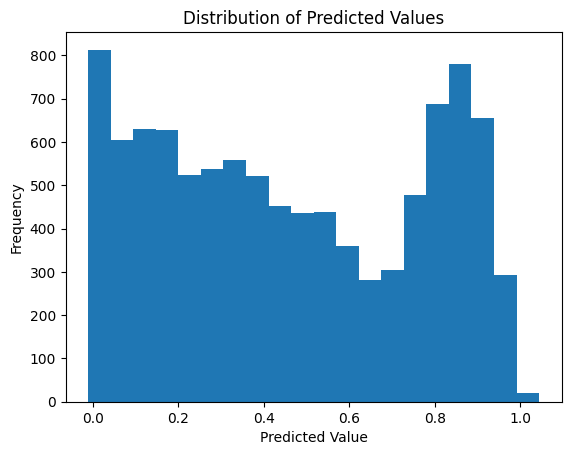

In [31]:
# 예측 값 분포 확인
plt.hist(y_pred_xgb_mm, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

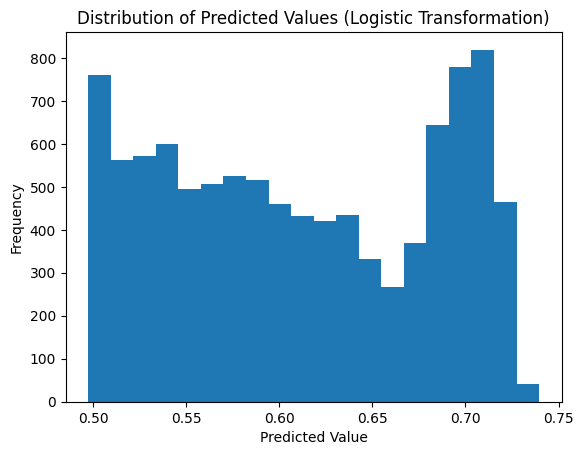

In [32]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_xgb_mm_lg = lg_function(y_pred_xgb_mm)

plt.hist(y_pred_xgb_mm_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

## 3) LightGBM

In [33]:
from lightgbm import LGBMRegressor

lgbm_sc = LGBMRegressor(n_jobs=-1)

parameters = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [-1, 4, 6],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8],
    'min_child_samples': [5, 15, 20]
}

grid_lgbm_sc = GridSearchCV(lgbm_sc,
                            param_grid=parameters, cv=5, refit=True)

grid_lgbm_sc.fit(X_train_sc, y_train_sc)

print("Best Hyperparameters:", grid_lgbm_sc.best_params_)
print("Best Score:", grid_lgbm_sc.best_score_)

# 최적 모델로 예측
best_model_lgbm_sc = grid_lgbm_sc.best_estimator_
y_pred_lgbm_sc = best_model_lgbm_sc.predict(X_test_sc)

# 평가 지표 계산
mae_lgbm_sc = mean_absolute_error(y_test_sc, y_pred_lgbm_sc)
mse_lgbm_sc = mean_squared_error(y_test_sc, y_pred_lgbm_sc)
r2_lgbm_sc = r2_score(y_test_sc, y_pred_lgbm_sc)
rmse_lgbm_sc = mean_squared_error(y_test_sc, y_pred_lgbm_sc, squared=False)

print('Mean Absolute Error (MAE):', mae_lgbm_sc)
print('Mean Squared Error (MSE):', mse_lgbm_sc)
print('Root Mean Squared Error (RMSE):', rmse_lgbm_sc)
print('R^2 Score:', r2_lgbm_sc)

Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 150, 'subsample': 0.7}
Best Score: 0.9456100634751206
Mean Absolute Error (MAE): 0.05550664971367668
Mean Squared Error (MSE): 0.0053584205595076755
Root Mean Squared Error (RMSE): 0.07320123331958059
R^2 Score: 0.9456655677435162


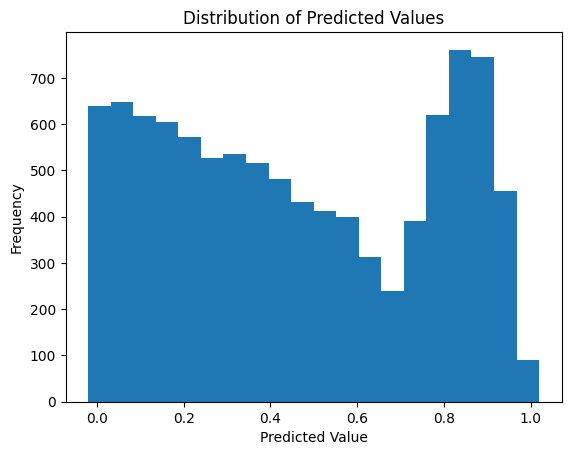

In [34]:
# 예측 값 분포 확인
plt.hist(y_pred_lgbm_sc, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

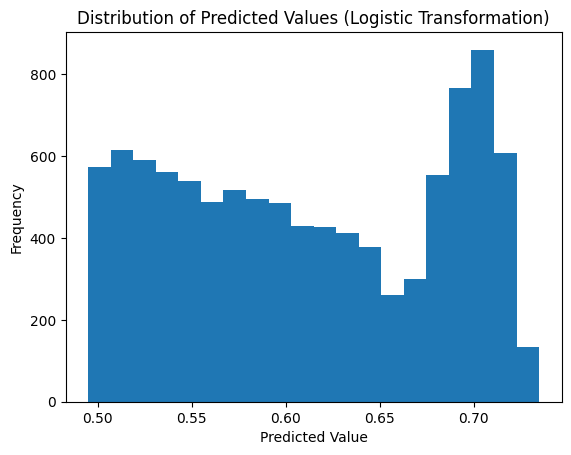

In [35]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_lgbm_sc_lg = lg_function(y_pred_lgbm_sc)

plt.hist(y_pred_lgbm_sc_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

In [36]:
lgbm_mm = LGBMRegressor(n_jobs=-1)

grid_lgbm_mm = GridSearchCV(lgbm_mm,
                            param_grid=parameters, cv=5, refit=True)

grid_lgbm_mm.fit(X_train_mm, y_train_mm)

print("Best Hyperparameters:", grid_lgbm_mm.best_params_)
print("Best Score:", grid_lgbm_mm.best_score_)

# 최적 모델로 예측
best_model_lgbm_mm = grid_lgbm_mm.best_estimator_
y_pred_lgbm_mm = best_model_lgbm_mm.predict(X_test_mm)

# 평가 지표 계산
mae_lgbm_mm = mean_absolute_error(y_test_mm, y_pred_lgbm_mm)
mse_lgbm_mm = mean_squared_error(y_test_mm, y_pred_lgbm_mm)
r2_lgbm_mm = r2_score(y_test_mm, y_pred_lgbm_mm)
rmse_lgbm_mm = mean_squared_error(y_test_mm, y_pred_lgbm_mm, squared=False)

print('Mean Absolute Error (MAE):', mae_lgbm_mm)
print('Mean Squared Error (MSE):', mse_lgbm_mm)
print('Root Mean Squared Error (RMSE):', rmse_lgbm_mm)
print('R^2 Score:', r2_lgbm_mm)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 150, 'subsample': 0.7}
Best Score: 0.9456718813777133
Mean Absolute Error (MAE): 0.05531648461416359
Mean Squared Error (MSE): 0.005345653092161564
Root Mean Squared Error (RMSE): 0.07311397330306679
R^2 Score: 0.9457950299762581


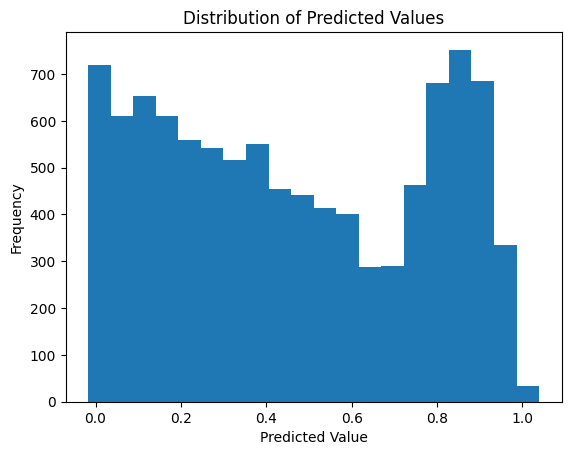

In [37]:
# 예측 값 분포 확인
plt.hist(y_pred_lgbm_mm, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

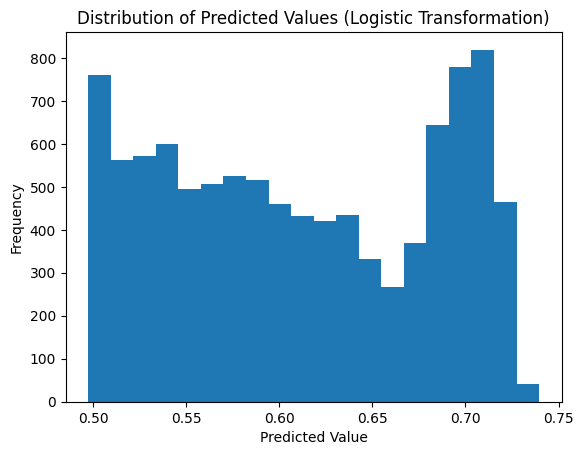

In [38]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_lgbm_mm_lg = lg_function(y_pred_lgbm_mm)

plt.hist(y_pred_xgb_mm_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

## 4) CatBoost

In [41]:
from catboost import CatBoostRegressor

catboost_sc = CatBoostRegressor()

parameters = {'learning_rate': [0.1, 0.01, 0.001],
              'depth': [6, 8, 10],
              'iterations': [100, 200, 300]}

grid_catboost_sc = GridSearchCV(catboost_sc,
                                param_grid=parameters, cv=5, refit=True)

grid_catboost_sc.fit(X_train_sc, y_train_sc)

print("Best Hyperparameters:", grid_catboost_sc.best_params_)
print("Best Score:", grid_catboost_sc.best_score_)

# 최적 모델로 예측
best_model_catboost_sc = grid_catboost_sc.best_estimator_
y_pred_catboost_sc = best_model_catboost_sc.predict(X_test_sc)

# 평가 지표 계산
mae_catboost_sc = mean_absolute_error(y_test_sc, y_pred_catboost_sc)
mse_catboost_sc = mean_squared_error(y_test_sc, y_pred_catboost_sc)
r2_catboost_sc = r2_score(y_test_sc, y_pred_catboost_sc)
rmse_catboost_sc = mean_squared_error(y_test_sc, y_pred_catboost_sc, squared=False)

print('Mean Absolute Error (MAE):', mae_catboost_sc)
print('Mean Squared Error (MSE):', mse_catboost_sc)
print('Root Mean Squared Error (RMSE):', rmse_catboost_sc)
print('R^2 Score:', r2_catboost_sc)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 0.3121479	total: 330ms	remaining: 9.09s
7:	learn: 0.3118727	total: 382ms	remaining: 9.18s
8:	learn: 0.3116099	total: 426ms	remaining: 9.05s
9:	learn: 0.3113345	total: 471ms	remaining: 8.96s
10:	learn: 0.3110629	total: 516ms	remaining: 8.86s
11:	learn: 0.3107955	total: 573ms	remaining: 8.97s
12:	learn: 0.3105243	total: 622ms	remaining: 8.94s
13:	learn: 0.3102498	total: 678ms	remaining: 9.01s
14:	learn: 0.3099803	total: 727ms	remaining: 8.97s
15:	learn: 0.3097076	total: 781ms	remaining: 8.98s
16:	learn: 0.3094339	total: 833ms	remaining: 8.97s
17:	learn: 0.3091676	total: 883ms	remaining: 8.93s
18:	learn: 0.3088980	total: 933ms	remaining: 8.88s
19:	learn: 0.3086315	total: 985ms	remaining: 8.87s
20:	learn: 0.3083646	total: 1.04s	remaining: 8.87s
21:	learn: 0.3081027	total: 1.08s	remaining: 8.74s
22:	learn: 0.3078316	total: 1.16s	remaining: 8.89s
23:	learn: 0.3075646	total: 1.25s	remaining: 9.2s
24:	learn: 0.3072964	total: 1.36s	remaining: 9.51s


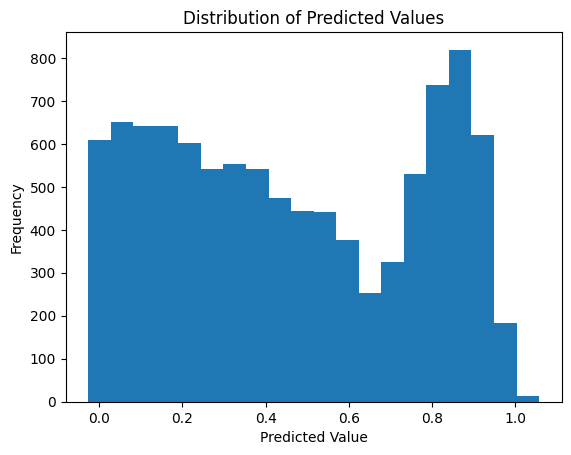

In [42]:
# 예측 값 분포 확인
plt.hist(y_pred_catboost_sc, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

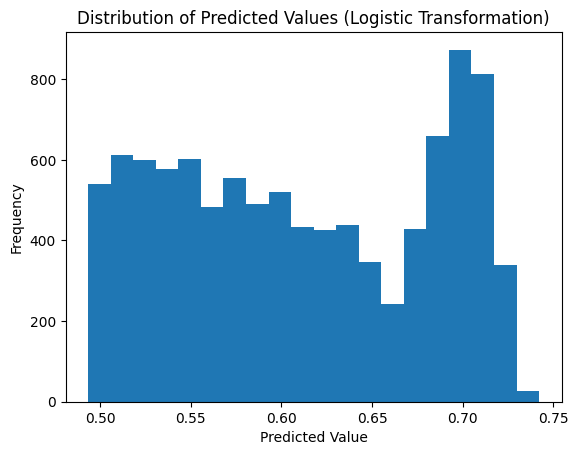

In [43]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_catboost_sc_lg = lg_function(y_pred_catboost_sc)

plt.hist(y_pred_catboost_sc_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

In [44]:
catboost_mm = CatBoostRegressor()

grid_catboost_mm = GridSearchCV(catboost_mm,
                                param_grid=parameters, cv=5, refit=True)

grid_catboost_mm.fit(X_train_mm, y_train_mm)

print("Best Hyperparameters:", grid_catboost_mm.best_params_)
print("Best Score:", grid_catboost_mm.best_score_)

# 최적 모델로 예측
best_model_catboost_mm = grid_catboost_mm.best_estimator_
y_pred_catboost_mm = best_model_catboost_mm.predict(X_test_mm)

# 평가 지표 계산
mae_catboost_mm = mean_absolute_error(y_test_mm, y_pred_catboost_mm)
mse_catboost_mm = mean_squared_error(y_test_mm, y_pred_catboost_mm)
r2_catboost_mm = r2_score(y_test_mm, y_pred_catboost_mm)
rmse_catboost_mm = mean_squared_error(y_test_mm, y_pred_catboost_mm, squared=False)

print('Mean Absolute Error (MAE):', mae_catboost_mm)
print('Mean Squared Error (MSE):', mse_catboost_mm)
print('Root Mean Squared Error (RMSE):', rmse_catboost_mm)
print('R^2 Score:', r2_catboost_mm)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 0.3121479	total: 369ms	remaining: 10.2s
7:	learn: 0.3118727	total: 420ms	remaining: 10.1s
8:	learn: 0.3116099	total: 471ms	remaining: 9.98s
9:	learn: 0.3113345	total: 531ms	remaining: 10.1s
10:	learn: 0.3110629	total: 588ms	remaining: 10.1s
11:	learn: 0.3107955	total: 649ms	remaining: 10.2s
12:	learn: 0.3105243	total: 713ms	remaining: 10.3s
13:	learn: 0.3102498	total: 762ms	remaining: 10.1s
14:	learn: 0.3099803	total: 816ms	remaining: 10.1s
15:	learn: 0.3097076	total: 867ms	remaining: 9.97s
16:	learn: 0.3094339	total: 921ms	remaining: 9.91s
17:	learn: 0.3091676	total: 977ms	remaining: 9.87s
18:	learn: 0.3088980	total: 1.04s	remaining: 9.9s
19:	learn: 0.3086315	total: 1.15s	remaining: 10.3s
20:	learn: 0.3083646	total: 1.23s	remaining: 10.5s
21:	learn: 0.3081027	total: 1.29s	remaining: 10.5s
22:	learn: 0.3078316	total: 1.39s	remaining: 10.7s
23:	learn: 0.3075646	total: 1.49s	remaining: 10.9s
24:	learn: 0.3072964	total: 1.59s	remaining: 11.1s


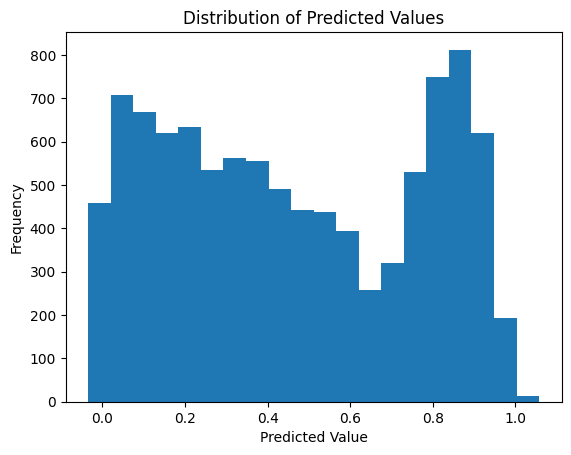

In [45]:
# 예측 값 분포 확인
plt.hist(y_pred_catboost_mm, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

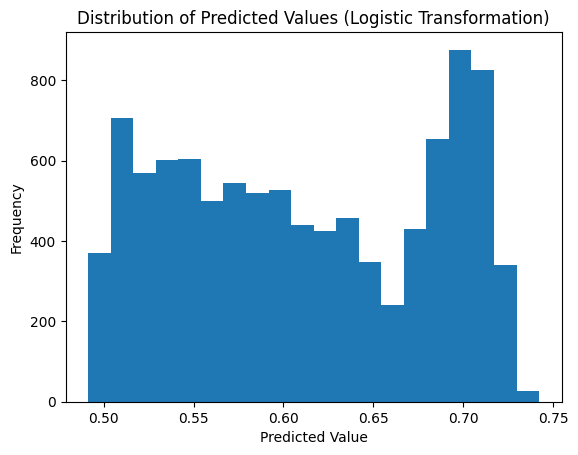

In [46]:
# 로지스틱 함수 적용하여 예측값 0~1 사이로 맞춤
y_pred_catboost_mm_lg = lg_function(y_pred_catboost_mm)

plt.hist(y_pred_catboost_mm_lg, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values (Logistic Transformation)')
plt.show()

### 최적 모델 => CatBoost(MinMaxScaler)

# 4. XAI
shap값은 각 특성의 중요도 및 예측에 미치는 영향

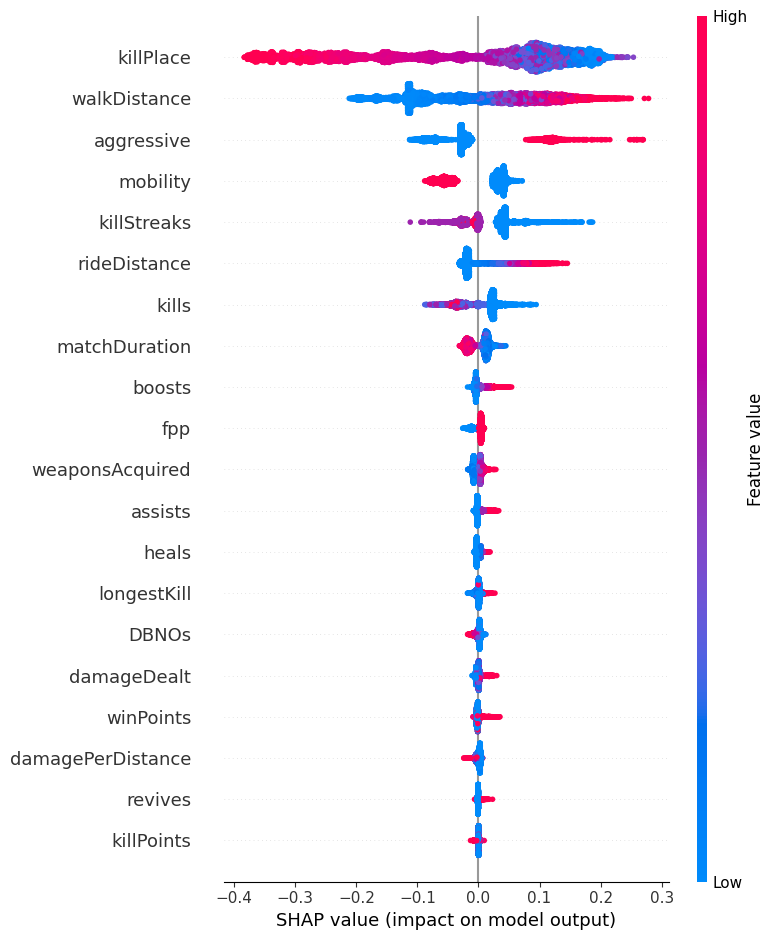

In [49]:
import shap

# 최적 모델에 대한 shap값 계산
explainer = shap.Explainer(best_model_catboost_mm)
# X_test_mm에 대한 shap값 계산
shap_values = explainer.shap_values(X_test_mm)

# SHAP summary plot 생성
shap.summary_plot(shap_values, X_test_mm, feature_names=X.columns)